In [137]:
from b2heavy.TwoPointFunctions.utils     import correlation_diagnostics
from b2heavy.TwoPointFunctions.types2pts import CorrelatorIO, plot_effective_coeffs
from b2heavy.TwoPointFunctions.fitter    import StagFitter

import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt

In [138]:
from b2heavy.ThreePointFunctions.corr3pts import BINSIZE as BSIZE

In the following section, we set all the parameter for the analysis

In [173]:
# Correlator specifics
ENSEMBLE = 'Coarse-2'
MESON    = 'Dsst'
MOMENTUM = '000'

DATA_DIR = '/Users/pietro/code/data_analysis/BtoD/Alex/'

BINSIZE  = BSIZE[ENSEMBLE]
SMSLIST  = ['1S-1S','d-d','d-1S']
# SMSLIST  = ['1S-1S']

# Correlation matrix specifics
DIAG   = False
BLOCK  = False
SCALE  = True
SHRINK = True
SVD    = 1e-12

# Specifics of the analysis
TRANGE_EFF = (17,25) 
TRANGE     = (6,0.25)
NSTATES    = 3
WPRIORS    = True
JKFIT      = False

In the following cell, we initialize the objects of `b2heavy` that read the data and format them

In [174]:
io   = CorrelatorIO(ENSEMBLE,MESON,MOMENTUM,PathToDataDir=DATA_DIR)
stag = StagFitter(
    io       = io,
    jkBin    = BINSIZE,
    smearing = SMSLIST
)

We also initialize the instruction to build the covariance matrix

In [175]:
cov_specs = dict(
    diag   = DIAG  ,
    block  = BLOCK ,
    scale  = SCALE ,
    shrink = SHRINK,
    cutsvd = SVD   
)

In the following, we calculate and plot effective mass

In [176]:
effm,effa = stag.meff(TRANGE_EFF,verbose=True,**cov_specs)

Least Square Fit:
  chi2/dof [dof] = 0.93 [27]    Q = 0.56    logGBF = 117.21

Parameters:
          const   1.1461 (16)     [ 1.1464 (42) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 0.87 [27]    Q = 0.66    logGBF = 148.17

Parameters:
('1S-1S', 'Unpol')      3.034 (15)      [   3.026 (40) ]  
 ('d-1S', 'Unpol')    0.30474 (82)      [  0.3046 (11) ]  
  ('d-d', 'Unpol')   0.030561 (88)      [ 0.03055 (11) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 3/0.0)
  fitter = scipy_least_squares    method = trf



/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


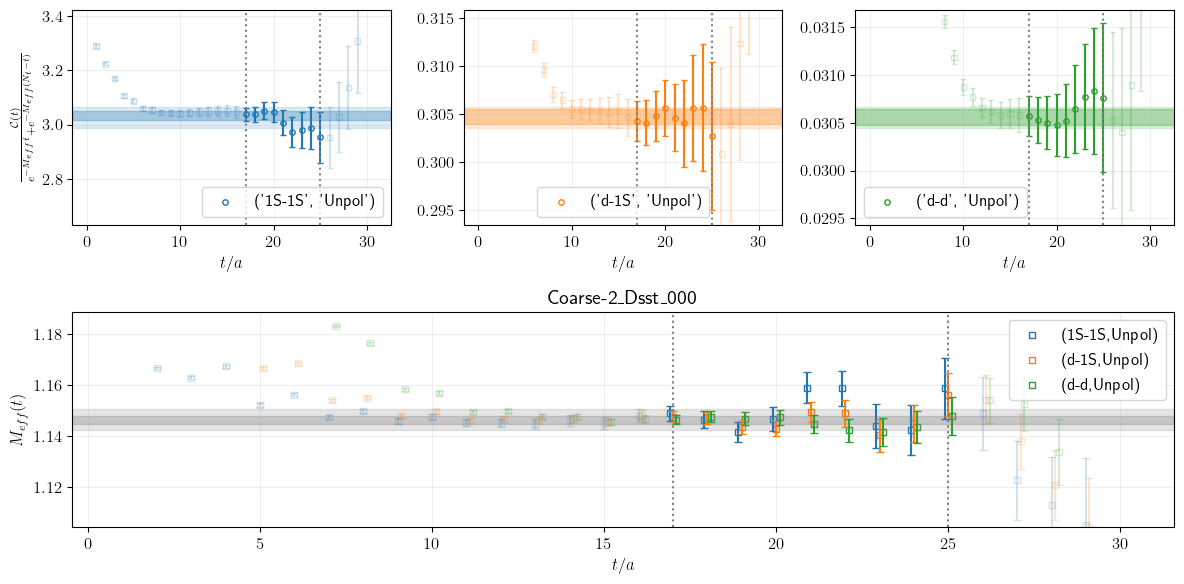

In [177]:
toplot = stag.meff(TRANGE_EFF,**cov_specs,plottable=True)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

plt.figure(figsize=(12, 6 if len(stag.keys)/len(SMSLIST)==1 else 8))
plot_effective_coeffs(TRANGE_EFF,Aknob=10,*toplot)

plt.title(f'{ENSEMBLE}_{MESON}_{MOMENTUM}')

plt.tight_layout()

plt.show()


Here we set priors

In [136]:
priors = stag.priors(NSTATES,Meff=effm,Aeff=effa)
priors = stag.priors(NSTATES)
for k,p in priors.items():
    print(k,p)

dE [1.343(32), -1.0(1.0), -1.0(1.0)]
dE.o [-1.50(57), -1.0(1.0), -1.0(1.0)]
Z.1S.Unpol [0 ± 1.2, 0.5(1.5), 0.5(3.0)]
Z.1S.Unpol.o [-1.2(1.2), 0.5(1.5), 0.5(3.0)]
Z.d.Unpol [-1.61(32), 0.5(1.5), 0.5(3.0)]
Z.d.Unpol.o [-3.0(1.5), 0.5(1.5), 0.5(3.0)]
Z.d-1S.Unpol [0.5(1.7), 0.5(1.7)]
Z.d-1S.Unpol.o [0.5(1.7), 0.5(1.7)]


In [133]:
from b2heavy.TwoPointFunctions.fitter_old import set_priors_phys
pol = '/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/fitter_PriorPolicy.toml'
p = set_priors_phys(stag,3,Meff=effm,Aeff=effa,prior_policy=pol)

Now we perform the fit

In [134]:
fit = stag.fit(
    Nstates = NSTATES,
    trange  = TRANGE,
    priors  = priors,
    # verbose = False,
    **cov_specs
)

In [135]:
fitres = stag.fit_result(
    NSTATES,
    TRANGE,
    verbose = True,
    priors  = priors if WPRIORS else None
)

# ---------- 3+3 fit in (6, 0.25) for mes: Dsst of ens: MediumCoarse for mom: 000 --------------
Least Square Fit:
  chi2/dof [dof] = 0.84 [54]    Q = 0.78    logGBF = 1315.9

Parameters:
            dE 0   1.35736 (47)      [ 1.343 (32) ]  
               1     -1.00 (60)      [ -1.0 (1.0) ]  
               2     -0.94 (23)      [ -1.0 (1.0) ]  
          dE.o 0     -1.63 (32)      [ -1.50 (57) ]  
               1     -1.92 (73)      [ -1.0 (1.0) ]  
               2     -1.08 (62)      [ -1.0 (1.0) ]  
    Z.1S.Unpol 0    0.5456 (31)      [    0 ± 1.2 ]  
               1      0.12 (82)      [  0.5 (1.5) ]  
               2      1.56 (84)      [  0.5 (3.0) ]  
  Z.1S.Unpol.o 0     -1.04 (82)      [ -1.2 (1.2) ]  
               1      1.00 (28)      [  0.5 (1.5) ]  
               2      0.6 (1.4)      [  0.5 (3.0) ]  
     Z.d.Unpol 0   -1.4638 (40)      [ -1.61 (32) ]  
               1      0.15 (19)      [  0.5 (1.5) ]  
               2      0.69 (16)      [  0.5 (3.0) ]  
  

In [88]:
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.size'] = 12

# npol = len(stag.keys)//len(SMSLIST)
# f, ax = plt.subplots(3,npol,figsize=(12,8))
# stag.plot_fit(ax,NSTATES,TRANGE)

# plt.tight_layout()